ALL IMPORT libraries USED

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats

In [2]:
#data of all signed NCAA players
signed2020 = pd.read_csv('data/Signed/NHLsigned20192020.csv', sep=',')
signed2019 = pd.read_csv('data/Signed/NHLsigned20182019.csv', sep=',')
signed2018 = pd.read_csv('data/Signed/NHLsigned20172018.csv', sep=',')
signed2017 = pd.read_csv('data/Signed/NHLsigned20162017.csv', sep=',')
signed2016 = pd.read_csv('data/Signed/NHLsigned20152016.csv', sep=',')


#data of all unsigned players
unsigned2020 = pd.read_csv('data/Unsigned/Season19-20.csv', sep=',')
unsigned2019 = pd.read_csv('data/Unsigned/Season18-19.csv', sep=',')
unsigned2018 = pd.read_csv('data/Unsigned/Season17-18.csv', sep=',')
unsigned2017 = pd.read_csv('data/Unsigned/Season16-17.csv', sep=',')
unsigned2016 = pd.read_csv('data/Unsigned/Season15-16.csv', sep=',')



I am now making histogram of signed players based on points per game. Comparing signed players as purple and unsigned as blue!!

Text(0, 0.5, 'Frequency')

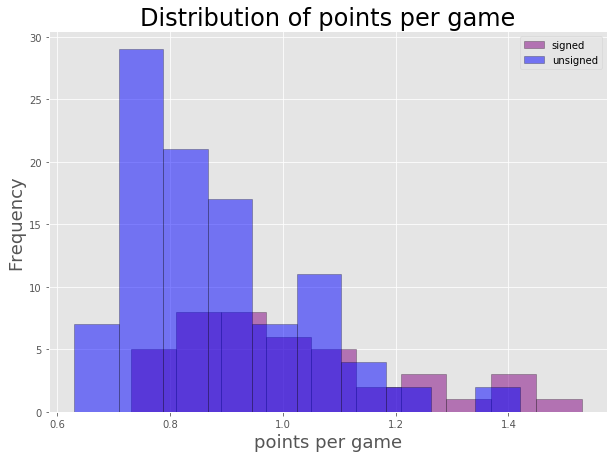

In [3]:
plt.style.use('ggplot')

#histogram of points per game 
signed2020.points_per_game.plot(kind='hist', color='purple', alpha=0.5, edgecolor='black', figsize=(10,7))
unsigned2020.points_per_game.plot(kind='hist', color='blue', alpha=0.5, edgecolor='black', figsize=(10,7))


plt.legend(labels=['signed', 'unsigned'])
plt.title('Distribution of points per game', size=24)
plt.xlabel('points per game', size=18)
plt.ylabel('Frequency', size=18)

##

In detail you can start to see that signed players, are more to the right of the x axis. Also note that frequency does not play an important factor because obviously more players will not make the NHL from NCAA

##

Text(0, 0.5, 'Frequency')

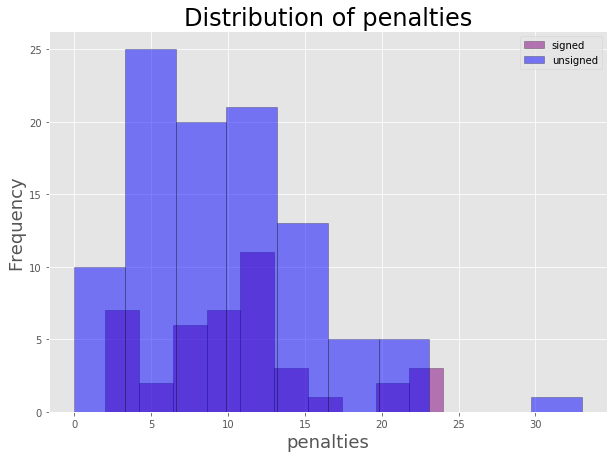

In [4]:
##histogrom comparing signed to unsigned players by penalties
plt.style.use('ggplot')

#histogram of penalties
signed2020.penalties.plot(kind='hist', color='purple', alpha=0.5, edgecolor='black', figsize=(10,7))
unsigned2020.penalties.plot(kind='hist', color='blue', alpha=0.5, edgecolor='black', figsize=(10,7))


plt.legend(labels=['signed', 'unsigned'])
plt.title('Distribution of penalties', size=24)
plt.xlabel('penalties', size=18)
plt.ylabel('Frequency', size=18)

Note that less players who are signed will take penalties. Although there are some that do take a lot of penalties, it is easy to see that players who are signed have syrong discipline, but also can be agressive!

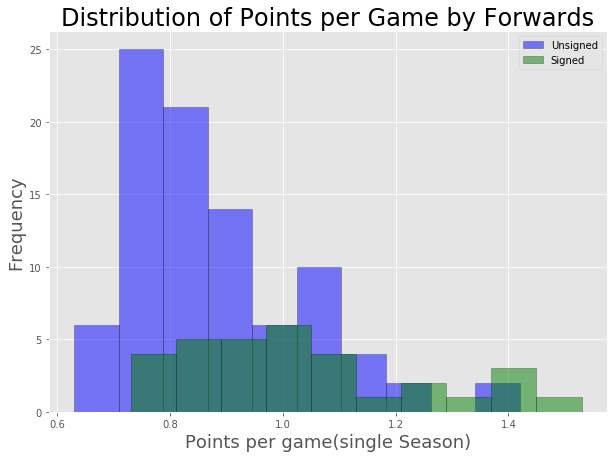

In [5]:


######Last In depth analysisi on 2020 players by position




# histogram of the position: Forwards
unsigned2020[unsigned2020['position'] == 'F'].points_per_game.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
signed2020[signed2020['position'] == 'F'].points_per_game.plot(kind='hist', color='green', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Unsigned', 'Signed'])
plt.title('Distribution of Points per Game by Forwards', size=24)
plt.xlabel('Points per game(single Season)', size=18)
plt.ylabel('Frequency', size=18);

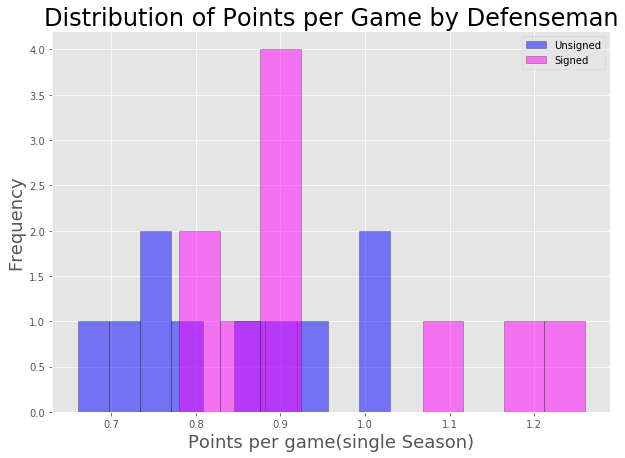

In [6]:
# histogram of the position: Defenseman 

unsigned2020[unsigned2020['position'] == 'D'].points_per_game.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
signed2020[signed2020['position'] == 'D'].points_per_game.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Unsigned', 'Signed'])
plt.title('Distribution of Points per Game by Defenseman', size=24)
plt.xlabel('Points per game(single Season)', size=18)
plt.ylabel('Frequency', size=18);

Notice that for both histograms analyzed there are cases that do standout, but they are the last bars on the x axis. Althouigh this can show in some degree diffrences between players who make the NHL and do not.

Now I am studying the impact using machine learning algorithm (LINEAR REGRESSION)


In the next couple of cells I will be looking at diffrent years in players starting from Freshman year to Senior year

In [7]:
#getting just Freshman from my dataframe
unsigned = unsigned2020[unsigned2020['year']=='FR']
signedFreshman = signed2020[signed2020['year']=='FR']



#this takes the polynomial - unsigned freshman
unsignedFreshForwards = np.polyfit(unsigned.points_per_game, unsigned.penalties, 1)

#this takes the polynomial - unsigned freshman
signedFreshForwards = np.polyfit(signedFreshman.points_per_game, signedFreshman.penalties, 1)


##very key in seeing difference 
print("unsigned plyers:  ", unsignedFreshForwards)
print("signed players:  ", signedFreshForwards)



unsigned plyers:   [-19.56264775  20.01536643]
signed players:   [-16.45059566  24.87175893]


Now I have gathered my information and can get a visualization of what the linear regression looks like from freshman

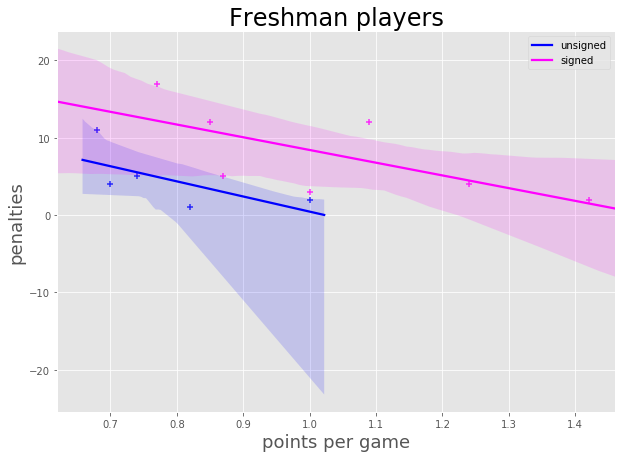

In [8]:
# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=unsigned.points_per_game, y=unsigned.penalties, color='blue', marker='+')
sns.regplot(x=signedFreshman.points_per_game, y=signedFreshman.penalties, color='magenta', marker='+')

plt.legend(labels=['unsigned', 'signed'])
plt.title('Freshman players', size=24)
plt.xlabel('points per game', size=18)
plt.ylabel('penalties', size=18);

calculating the diffrences in numbers from the linear regressions intercepts and coefficients 

In [9]:
#for unsigned players
unsigned = unsigned2020[unsigned2020['year']=='FR']

#creating linear regression object
linearRegress_unsigned= LinearRegression()

#fit linear regression
linearRegress_unsigned.fit(unsigned[['points_per_game']], unsigned['penalties'])

#getting slop and intercept of best fit line
print(linearRegress_unsigned.intercept_)
print(linearRegress_unsigned.coef_)


20.015366430260045
[-19.56264775]


In [10]:
#for signed players
signed = signed2020[signed2020['year']=='FR']

#creating linear regression object
linearRegress_signed= LinearRegression()

#fit linear regression
linearRegress_signed.fit(signed[['points_per_game']], signed['penalties'])

#getting slop and intercept of best fit line
print(linearRegress_signed.intercept_)
print(linearRegress_signed.coef_)



24.871758934828314
[-16.45059566]


Prediction for Freshman

In [11]:
signed = signed2020[signed2020['year']=='FR']
unsigned = unsigned2020[unsigned2020['year']=='FR']



# fit the model by signed players
signedFit = np.polyfit(signed.points_per_game, signed.penalties, 1)

# predictions
print(np.polyval(signedFit, [.5]))

# fit the model by unsigned players
lr_unsigned = LinearRegression()
lr_unsigned.fit(unsigned[['points_per_game']], unsigned['penalties'])

# predictions
print(lr_unsigned.predict([[.2]]))

[16.64646111]
[16.10283688]


correlation coefficient 

In [12]:

signed = signed2020[signed2020['year']=='FR']

pearson_coef, p_value = stats.pearsonr(signed.points, signed.games_played)

print("the signed players coefficient is:    " + str(pearson_coef))

unsigned = unsigned2020[unsigned2020['year']=='FR']
unsignedpearson_coef, p_value = stats.pearsonr(unsigned.points, unsigned.games_played)
print("the unsigned players coefficient is:    " + str(unsignedpearson_coef))








the signed players coefficient is:    -0.08122848471460142
the unsigned players coefficient is:    -0.5524060053756081


<font color='red'>Now a look at sophmores

</font>


In [13]:
#looking at sophmore forwards in depth 
unsignedSO = unsigned2020[unsigned2020['year']=='SO']
signedSO = signed2020[signed2020['year']=='SO']

#this takes the polynomial - unsigned sophmore forwards
UnSO = np.polyfit(unsignedSO.points_per_game, unsignedSO.penalties, 1)

#this takes the polynomial - unsigned sophmore forwards
signSO = np.polyfit(signedSO.points_per_game, signedSO.penalties, 1)





##very key in seeing difference 
print("unsigned plyers:  ", UnSO)
print("signed players:  ", signSO)

unsigned plyers:   [14.38356164 -0.50068493]
signed players:   [ 1.32702547 10.81996109]


Prediction for Sophmores

In [14]:
signedSO = signed2020[signed2020['year']=='SO']
unsignedSO = unsigned2020[unsigned2020['year']=='SO']



# fit the model by signed players
signedFitSO = np.polyfit(signedSO.points_per_game, signedSO.penalties, 1)

# predictions
print(np.polyval(signedFitSO, [.5]))

# fit the model by unsigned players
lr_unsignedSO = LinearRegression()
lr_unsignedSO.fit(unsignedSO[['points_per_game']], unsignedSO['penalties'])

# predictions
print(lr_unsignedSO.predict([[.83]]))

[11.48347383]
[11.43767123]


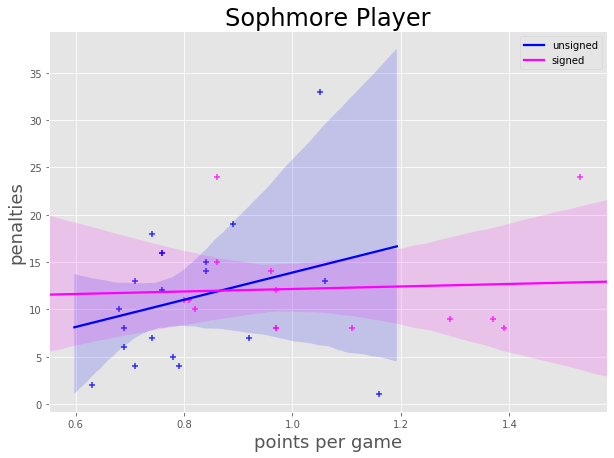

In [15]:
# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=unsignedSO.points_per_game, y=unsignedSO.penalties, color='blue', marker='+')
sns.regplot(x=signedSO.points_per_game, y=signedSO.penalties, color='magenta', marker='+')

plt.legend(labels=['unsigned', 'signed'])
plt.title('Sophmore Player', size=24)
plt.xlabel('points per game', size=18)
plt.ylabel('penalties', size=18);

In [16]:
pearson_coef, p_value = stats.pearsonr(signedSO.points_per_game, signedSO.penalties)
print(pearson_coef)

unsignedpearson_coef, p_value = stats.pearsonr(unsignedSO.points_per_game, unsignedSO.penalties)
print(unsignedpearson_coef)

0.05955150892981889
0.2718659722038661


<font color='red'>Now a look at juniors

</font>

In [17]:
#looking at Juniors forwards in depth 
unsignedJR = unsigned2020[unsigned2020['year']=='JR']
signedJR = signed2020[signed2020['year']=='JR']

#this takes the polynomial - unsigned sophmore forwards
UnJR = np.polyfit(unsignedJR.points_per_game, unsignedJR.penalties, 1)

#this takes the polynomial - unsigned sophmore forwards
signJR = np.polyfit(signedJR.points_per_game, signedJR.penalties, 1)



##very key in seeing difference 
print("unsigned plyers:  ", UnJR)
print("signed players:  ", signJR)

unsigned plyers:   [-3.45625351 12.45840928]
signed players:   [1.69496035 9.33763504]


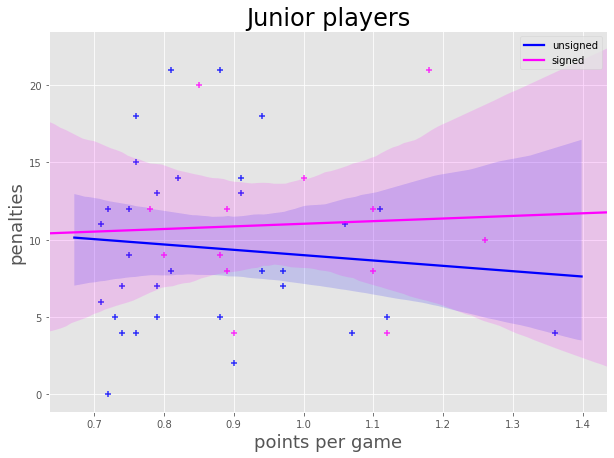

In [18]:
# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=unsignedJR.points_per_game, y=unsignedJR.penalties, color='blue', marker='+')
sns.regplot(x=signedJR.points_per_game, y=signedJR.penalties, color='magenta', marker='+')

# Legend, title and labels.
plt.legend(labels=['unsigned', 'signed'])
plt.title('Junior players', size=24)
plt.xlabel('points per game', size=18)
plt.ylabel('penalties', size=18);

In [19]:
pearson_coef, p_value = stats.pearsonr(signedJR.points_per_game, signedJR.penalties)
print(pearson_coef)

unsignedpearson_coef, p_value = stats.pearsonr(unsignedJR.points_per_game, unsignedJR.penalties)
print(unsignedpearson_coef)

0.051105101135763144
-0.09654851158219185


Prediction for Juniors

In [20]:
signedJR = signed2020[signed2020['year']=='JR']
unsignedJR = unsigned2020[unsigned2020['year']=='JR']



# fit the model by signed players
signedFitJR = np.polyfit(signedJR.points_per_game, signedJR.penalties, 1)

# predictions
print(np.polyval(signedFitJR, [.5]))

# fit the model by unsigned players
lr_unsignedJR = LinearRegression()
lr_unsignedJR.fit(unsignedJR[['points_per_game']], unsignedJR['penalties'])

# predictions
print(lr_unsignedJR.predict([[.66]]))

[10.18511521]
[10.17728197]


<font color='red'>Now a look at Seniors

</font>

In [21]:
#looking at Seniors forwards in depth 
unsignedSR = unsigned2020[unsigned2020['year']=='SR']
signedSR = signed2020[signed2020['year']=='SR']

#this takes the polynomial - unsigned sophmore forwards
UnSR = np.polyfit(unsignedSR.points_per_game, unsignedSR.penalties, 1)

#this takes the polynomial - unsigned sophmore forwards
signSR = np.polyfit(signedSR.points_per_game, signedSR.penalties, 1)

##very key in seeing difference 
print("unsigned plyers:  ", UnSR)
print("signed players:  ", signSR)

unsigned plyers:   [-4.42478078 13.59374543]
signed players:   [7.39259259 2.4357037 ]


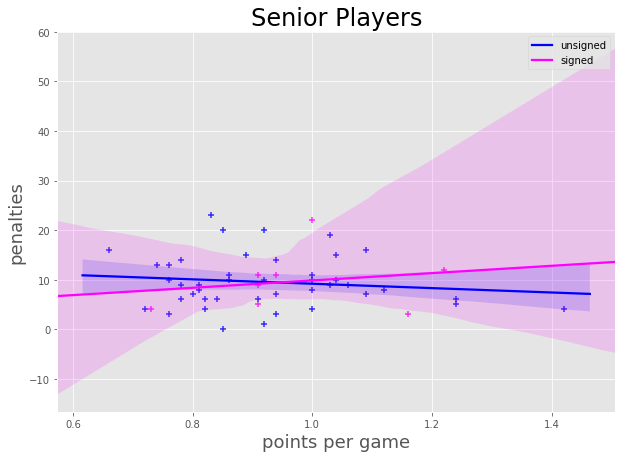

In [22]:
# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=unsignedSR.points_per_game, y=unsignedSR.penalties, color='blue', marker='+')
sns.regplot(x=signedSR.points_per_game, y=signedSR.penalties, color='magenta', marker='+')

# Legend, title and labels.
plt.legend(labels=['unsigned', 'signed'])
plt.title('Senior Players', size=24)
plt.xlabel('points per game', size=18)
plt.ylabel('penalties', size=18);

In [23]:
pearson_coef, p_value = stats.pearsonr(signedSR.points_per_game, signedSR.penalties)
print(pearson_coef)

unsignedpearson_coef, p_value = stats.pearsonr(unsignedSR.points_per_game, unsignedSR.penalties)
print(unsignedpearson_coef)

0.18838070261287054
-0.12973066024442007


Preduction for Seniors

In [24]:
signedSR = signed2020[signed2020['year']=='SR']
unsignedSR = unsigned2020[unsigned2020['year']=='SR']



# fit the model by signed players
signedFitSR = np.polyfit(signedSR.points_per_game, signedSR.penalties, 1)

# predictions
print(np.polyval(signedFitSR, [.5]))

# fit the model by unsigned players
lr_unsignedSR = LinearRegression()
lr_unsignedSR.fit(unsignedSR[['points_per_game']], unsignedSR['penalties'])

# predictions
print(lr_unsignedSR.predict([[1.69]]))

[6.132]
[6.11586591]


<font color='red'>Comparring all the season in one graph

</font>

A very important analysis showingh that what I've seen in the data is very much true

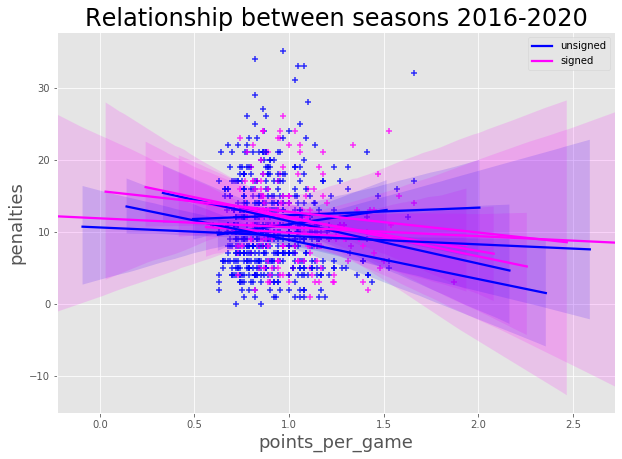

In [25]:
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=unsigned2016.points_per_game, y=unsigned2016.penalties, color='blue', marker='+')
sns.regplot(x=signed2016.points_per_game, y=signed2016.penalties, color='magenta', marker='+')
sns.regplot(x=unsigned2017.points_per_game, y=unsigned2017.penalties, color='blue', marker='+')
sns.regplot(x=signed2017.points_per_game, y=signed2017.penalties, color='magenta', marker='+')
sns.regplot(x=unsigned2018.points_per_game, y=unsigned2018.penalties, color='blue', marker='+')
sns.regplot(x=signed2018.points_per_game, y=signed2018.penalties, color='magenta', marker='+')
sns.regplot(x=unsigned2019.points_per_game, y=unsigned2019.penalties, color='blue', marker='+')
sns.regplot(x=signed2019.points_per_game, y=signed2019.penalties, color='magenta', marker='+')
sns.regplot(x=unsigned2020.points_per_game, y=unsigned2020.penalties, color='blue', marker='+')
sns.regplot(x=signed2020.points_per_game, y=signed2020.penalties, color='magenta', marker='+')





plt.legend(labels=['unsigned', 'signed'])
plt.title('Relationship between seasons 2016-2020', size=24)
plt.xlabel('points_per_game', size=18)
plt.ylabel('penalties', size=18);